In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [2]:
def load_data(path, transpose = True):
    data = sio.loadmat(path)
    X = data.get('X')
    y = data.get('y') # (5000, 1)
    y = y.reshape(y.shape[0])# to column vector
    # 为了使用标签向量化函数
    y1 = data.get('y')
    
    if transpose:
        X = np.array([im.reshape((20, 20)).T for im in X])
        X = np.array([im.reshape(400) for im in X])
    
    return X, y, y1

In [3]:
# test reshape
# tmp = np.array([[1],[2],[3]])
# print(tmp)

# print(tmp.shape)
# tmp1 = tmp.reshape(tmp.shape[0])
# print(tmp1)


In [4]:
# test im
# data = sio.loadmat('../data_wu/ex4data1.mat')
# X = data.get('X')
# X.shape
# X
# X1 = np.array([im.reshape((20, 20)).T for im in X])
# X1.shape
# X1
# X2 = np.array([im.reshape(400) for im in X1])
# X2.shape
# X2
print(np.arange(5))
range(5)

[0 1 2 3 4]


range(0, 5)

In [5]:
X, y , y1 = load_data('../data_wu/ex4data1.mat')
X.shape, y.shape

((5000, 400), (5000,))

4246


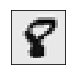

this should be 8


In [6]:
# 随机绘制一幅图像
pick_one = np.random.randint(0, X.shape[0])
print(pick_one)
data = X[pick_one, :]
fig, ax = plt.subplots(figsize = (1, 1))
ax.matshow(data.reshape((20, 20)), cmap = matplotlib.cm.binary)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
plt.show()
print('this should be {}'.format(y[pick_one]))

<function matplotlib.pyplot.show(*args, **kw)>

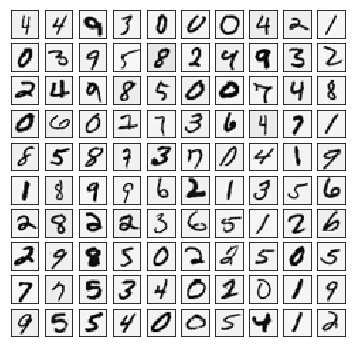

In [7]:
# print(np.random.choice(10, 2))
def plot_100_image(X):
    size = int(np.sqrt(X.shape[1]))
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
    sample_images = X[sample_idx, :]
    
    fig, ax_array = plt.subplots(nrows = 10, ncols = 10, sharex = True, sharey = True, figsize = (6, 6))
    
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)), cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            
plot_100_image(X)
plt.show

In [8]:
X_raw, y, y_raw = load_data('../data_wu/ex4data1.mat', transpose = False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis = 1) # 在第一列插入全为1的列
X.shape, y_raw.shape

((5000, 401), (5000, 1))

In [9]:
y_raw

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [10]:
# 将标签向量化
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y_raw)
y_onehot.shape

(5000, 10)

In [11]:
y = y_onehot
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
# 读取权重
def load_weight(path):
    data = sio.loadmat(path)
    
    return data['Theta1'], data['Theta2']

In [13]:
t1, t2 = load_weight('../data_wu/ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))